<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Integral%20Monte%20Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Importamos libreria necesarias
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [53]:
# Definimos nuestra funcion
def f(x):
  return np.cos((np.pi*x)/2)

In [54]:
# Método de Monte Carlo para aproximar la integral
def monte_carlo_integral(a, b, N):
    # Generaramos N puntos aleatorios en el intervalo [a, b]
    puntos = np.random.uniform(a, b, N)

    # Evaluar la función en los puntos aleatorios
    valores_funcion = f(puntos)

    # Calcular la media de los valores de la función
    media = np.mean(valores_funcion)

    # Multiplicar la media por el tamaño del intervalo (b - a)
    integral = (b - a) * media
    return integral, valores_funcion

In [ ]:
# Calcular la integral utilizando Monte Carlo
resultado,valores_funcion = monte_carlo_integral(0, 1, 100)

In [55]:
print(f"Estimación de la integral: {resultado}")

Estimación de la integral: 0.6139473284814241


In [56]:
# Graficar las aproximaciones y distribuciones
def graficar_monte_carlo(a, b, N):
    aproximaciones = []
    sum_acumulada = 0

    # Generar los valores usando Monte Carlo
    for i in range(1, N + 1):
        _, valores_funcion = monte_carlo_integral(a, b, i)
        sum_acumulada += np.mean(valores_funcion)
        aproximacion = (b - a) * sum_acumulada / i
        aproximaciones.append(aproximacion)

    # Crear gráfico
    plt.figure(figsize=(10, 6))
# Graficar las aproximaciones de la integral
    plt.subplot(2, 1, 1)
    plt.plot(range(1, N + 1), aproximaciones, label="Aproximación Monte Carlo", color="b")
    plt.axhline(y=np.exp(1) - 1, color="r", linestyle="--", label="Valor real $\int_0^1 cos((np.pi*x)/2) dx $")
    plt.title(f"Aproximación de la integral con Monte Carlo (N={N})")
    plt.xlabel("Número de puntos")
    plt.ylabel("Aproximación de la integral")
    plt.legend()

    # Graficar la distribución de los valores obtenidos
    plt.subplot(2, 1, 2)
    plt.hist(valores_funcion, bins=30, density=True, alpha=0.7, color="g")
    plt.title("Distribución de los valores obtenidos de la función")
    plt.xlabel("Valores de la función")
    plt.ylabel("Densidad")

    plt.tight_layout()
    plt.show()

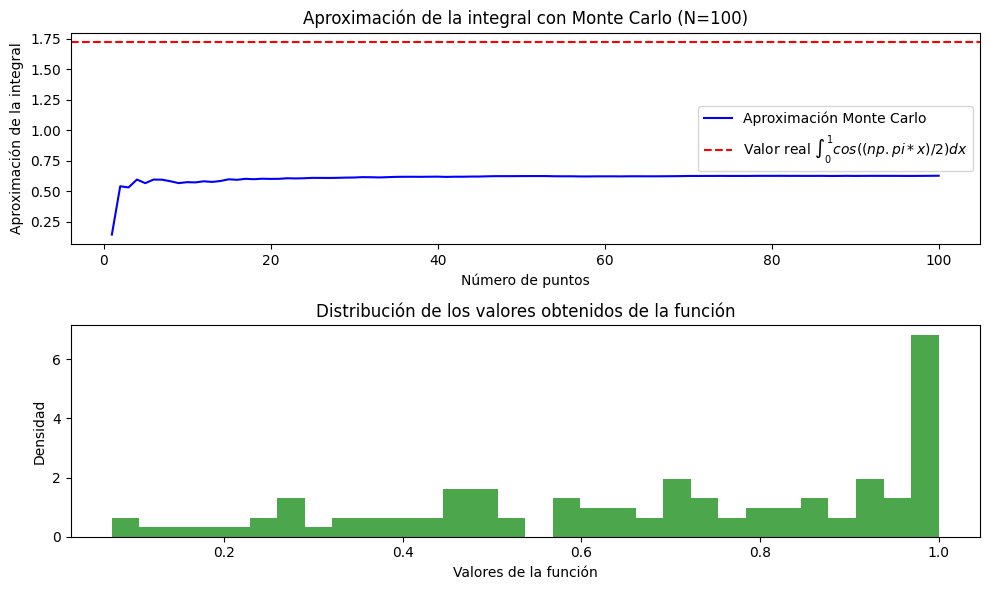

In [57]:
# Generar gráfica
graficar_monte_carlo(0, 1, 100)